<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#LDA" data-toc-modified-id="LDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LDA</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['target'] = cancer.target

<AxesSubplot:xlabel='target', ylabel='count'>

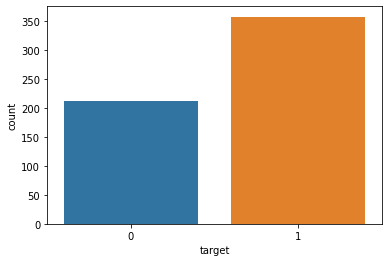

In [9]:
sns.countplot(data=df, x='target')

In [12]:
plt.rcParams['figure.figsize'] = (10,10)

<AxesSubplot:>

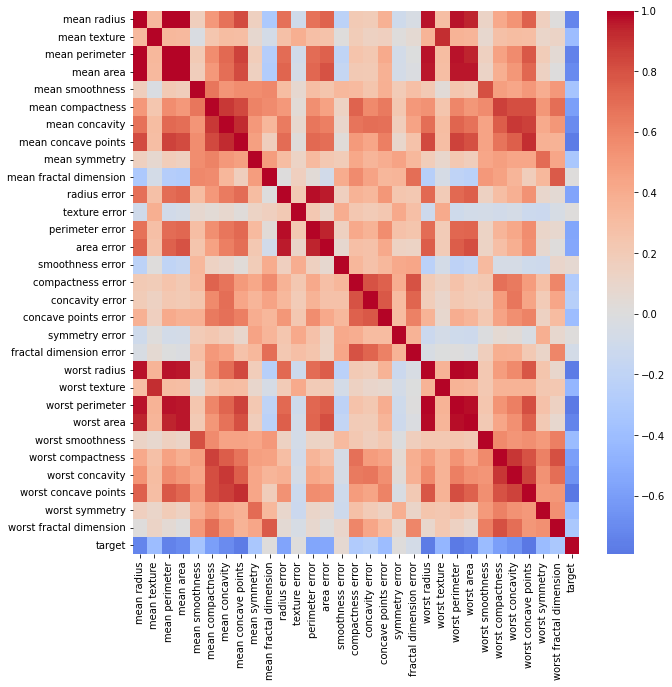

In [13]:
sns.heatmap(df.corr(),center=0, cmap='coolwarm')

<AxesSubplot:xlabel='target', ylabel='mean area'>

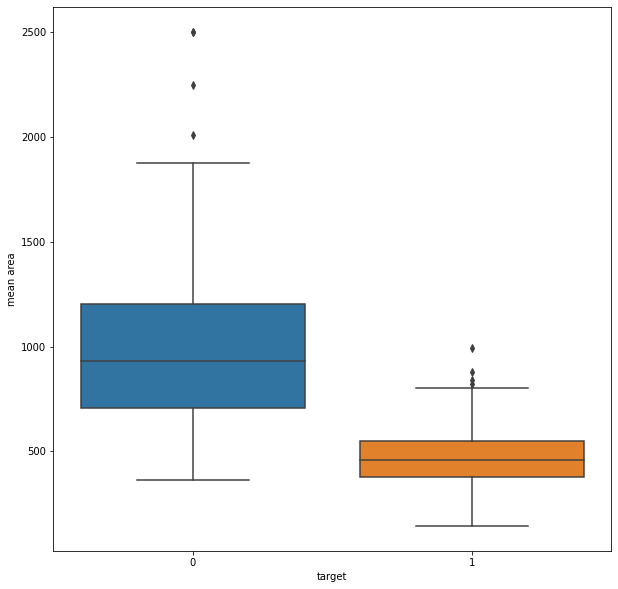

In [15]:
sns.boxplot(data=df, y='mean area', x='target')

In [16]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression(max_iter=10000)

In [25]:
X = cancer.data
y = cancer.target

In [26]:
model.fit(X, y)

LogisticRegression(max_iter=10000)

In [27]:
model.score(X,y)

0.9578207381370826

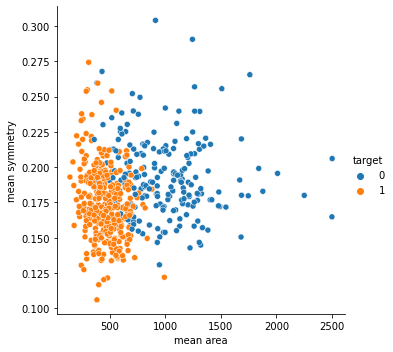

In [35]:
sns.relplot(data=df, x='mean area', y='mean symmetry', hue='target')

# PCA

In [36]:
from sklearn.decomposition import PCA, NMF

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
X = StandardScaler().fit_transform(cancer.data)

In [88]:
pca = PCA(n_components=2)

In [90]:
pca.fit(X)

PCA(n_components=2)

In [91]:
pca.components_.shape

(2, 30)

In [41]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random

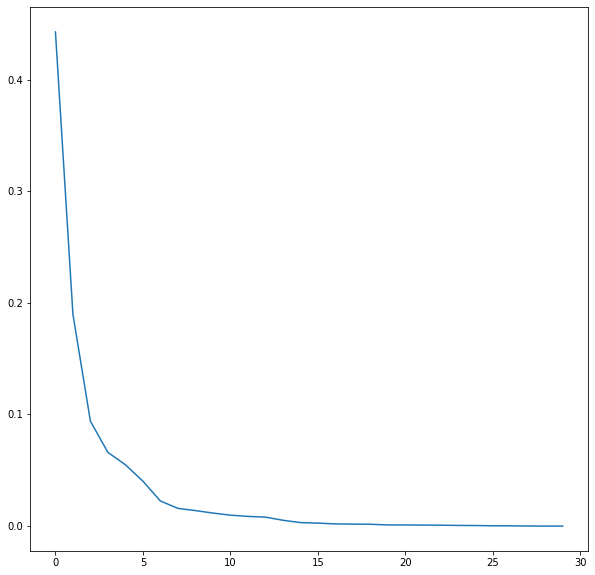

In [45]:
plt.plot(pca.explained_variance_ratio_)

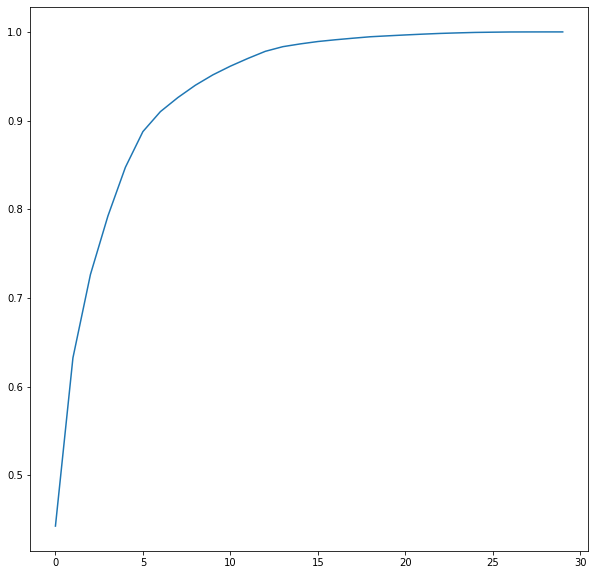

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [46]:
pca.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

<AxesSubplot:>

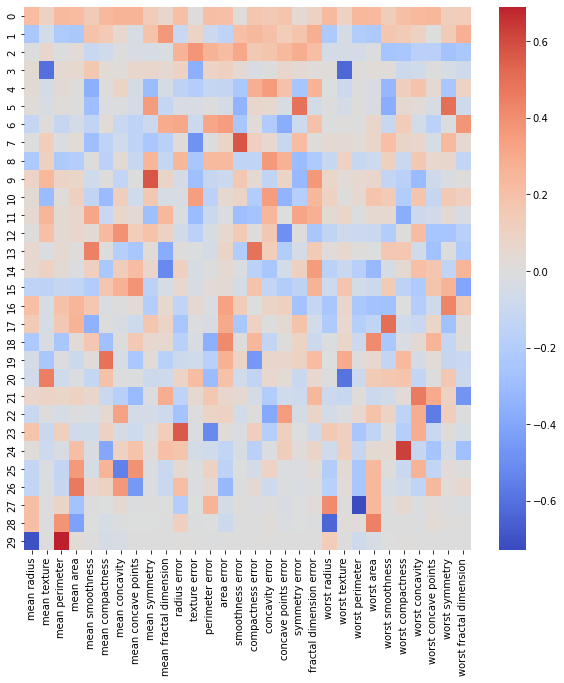

In [49]:
sns.heatmap(pd.DataFrame(pca.components_, columns=cancer.feature_names), center=0, cmap='coolwarm')

In [55]:
loadings = pca.transform(X)

In [85]:
X2 = loadings[:,-4:-1]

In [86]:
X2.shape

(569, 3)

In [87]:
model.fit(X2,y)
model.score(X2,y)

0.6274165202108963

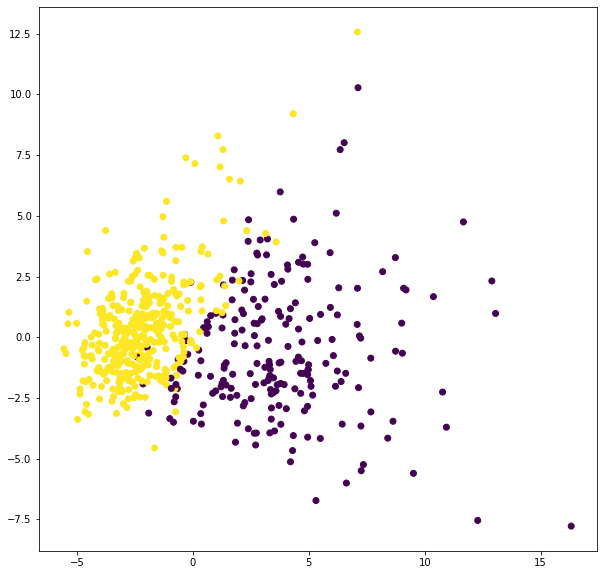

In [66]:
plt.scatter(loadings[:,0], loadings[:,1], c=cancer.target)

# LDA

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [70]:
lda = LinearDiscriminantAnalysis()

In [74]:
x = lda.fit_transform(X, y)

In [75]:
x.shape

(569, 1)

In [77]:
lda.score(X, y)

0.9648506151142355

In [78]:
y_pred = lda.predict(X)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       212
           1       0.95      0.99      0.97       357

    accuracy                           0.96       569
   macro avg       0.97      0.95      0.96       569
weighted avg       0.97      0.96      0.96       569



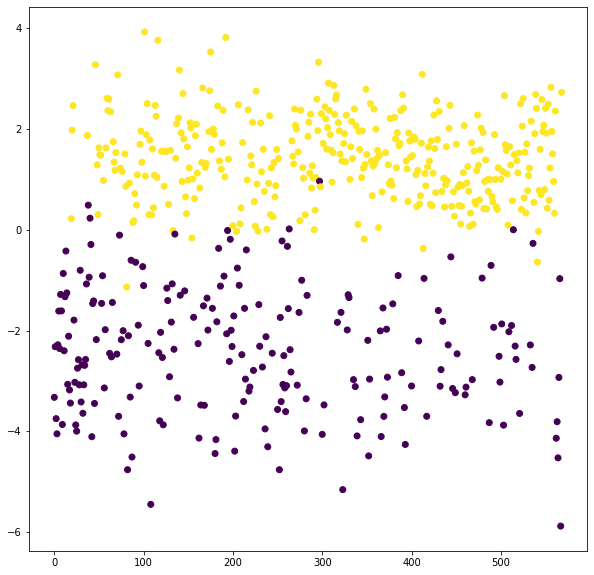

In [81]:
plt.scatter(range(len(df)), x, c=y)